<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Step 1: Data Loading

In [2]:
batch_size = 32
img_height = 150
img_width = 150

In [3]:

train_data_generator = ImageDataGenerator(
    rescale = 1./255)

test_data_generator = ImageDataGenerator(
    rescale = 1./255)
valid_data_generator = ImageDataGenerator(
    rescale = 1./255)

In [4]:
# Directories for your training, validation and test splits
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
train_data = train_data_generator.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

val_data = test_data_generator.flow_from_directory(
    validation_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode='categorical')

test_data = valid_data_generator.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [6]:
class_num = train_data.num_classes
class_num

10

## Step 2:  Develop the Image Classification Models

### Model #1

In [7]:
# Build the Model
ResNet50V2 = tf.keras.applications.resnet_v2.ResNet50V2(
    input_shape=(img_width, img_height, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg',
    classes=class_num
)

for layer in ResNet50V2.layers:
    layer.trainable = False
    
model_ResNet = tf.keras.Sequential([
    ResNet50V2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(class_num, activation = 'softmax')
    ])

model_ResNet.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=.0001), 
    metrics=['accuracy'])

In [8]:
# Train the Model
epochs=150
history = model_ResNet.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
  use_multiprocessing = False
)

Epoch 1/150
235/235 [==============================] - 112s 473ms/step - loss: 2.2620 - accuracy: 0.2711 - val_loss: 1.6782 - val_accuracy: 0.4525
Epoch 2/150
235/235 [==============================] - 111s 471ms/step - loss: 1.4066 - accuracy: 0.5337 - val_loss: 1.3347 - val_accuracy: 0.5650
Epoch 3/150
235/235 [==============================] - 111s 472ms/step - loss: 1.1691 - accuracy: 0.6172 - val_loss: 1.2018 - val_accuracy: 0.6220
Epoch 4/150
235/235 [==============================] - 109s 466ms/step - loss: 1.0491 - accuracy: 0.6631 - val_loss: 1.1282 - val_accuracy: 0.6400
Epoch 5/150
235/235 [==============================] - 110s 468ms/step - loss: 0.9720 - accuracy: 0.6844 - val_loss: 1.0736 - val_accuracy: 0.6480
Epoch 6/150
235/235 [==============================] - 111s 473ms/step - loss: 0.9145 - accuracy: 0.7079 - val_loss: 1.0410 - val_accuracy: 0.6530
Epoch 7/150
235/235 [==============================] - 109s 464ms/step - loss: 0.8700 - accuracy: 0.7191 - val_loss: 1

235/235 [==============================] - 109s 463ms/step - loss: 0.1810 - accuracy: 0.9691 - val_loss: 1.0994 - val_accuracy: 0.7100
Epoch 112/150
235/235 [==============================] - 109s 462ms/step - loss: 0.1799 - accuracy: 0.9701 - val_loss: 1.1027 - val_accuracy: 0.7085
Epoch 113/150
235/235 [==============================] - 109s 463ms/step - loss: 0.1778 - accuracy: 0.9715 - val_loss: 1.1004 - val_accuracy: 0.7070
Epoch 114/150
235/235 [==============================] - 109s 464ms/step - loss: 0.1755 - accuracy: 0.9707 - val_loss: 1.1062 - val_accuracy: 0.7035
Epoch 115/150
235/235 [==============================] - 109s 463ms/step - loss: 0.1742 - accuracy: 0.9723 - val_loss: 1.1145 - val_accuracy: 0.7055
Epoch 116/150
235/235 [==============================] - 109s 463ms/step - loss: 0.1722 - accuracy: 0.9724 - val_loss: 1.1109 - val_accuracy: 0.7040
Epoch 117/150
235/235 [==============================] - 110s 469ms/step - loss: 0.1702 - accuracy: 0.9723 - val_loss: 1

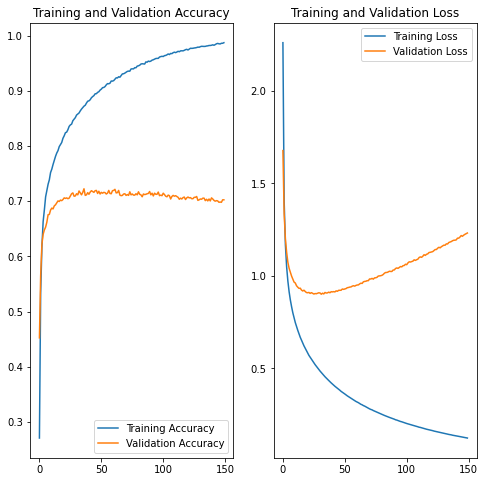

In [9]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
# Save the Model
model_ResNet.save('food_model_1.h5')

### Model #2

In [13]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(class_num, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adagrad(learning_rate=.02),
              metrics=['acc'])

In [15]:
# Train the Model

epochs= 150
history3 = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/150
235/235 [==============================] - 54s 228ms/step - loss: 1.8133 - acc: 0.3720 - val_loss: 1.8087 - val_acc: 0.3670
Epoch 2/150
235/235 [==============================] - 54s 229ms/step - loss: 1.6867 - acc: 0.4088 - val_loss: 1.6945 - val_acc: 0.4265
Epoch 3/150
235/235 [==============================] - 53s 227ms/step - loss: 1.5730 - acc: 0.4637 - val_loss: 1.6771 - val_acc: 0.4220
Epoch 4/150
235/235 [==============================] - 54s 228ms/step - loss: 1.4664 - acc: 0.5021 - val_loss: 1.5803 - val_acc: 0.4750
Epoch 5/150
235/235 [==============================] - 54s 228ms/step - loss: 1.3523 - acc: 0.5419 - val_loss: 1.5586 - val_acc: 0.4795
Epoch 6/150
235/235 [==============================] - 53s 226ms/step - loss: 1.2414 - acc: 0.5773 - val_loss: 1.5719 - val_acc: 0.4795
Epoch 7/150
235/235 [==============================] - 54s 229ms/step - loss: 1.1110 - acc: 0.6269 - val_loss: 1.4837 - val_acc: 0.5065
Epoch 8/150
235/235 [===========================

235/235 [==============================] - 54s 231ms/step - loss: 3.8569e-05 - acc: 1.0000 - val_loss: 4.7383 - val_acc: 0.5255
Epoch 118/150
235/235 [==============================] - 54s 231ms/step - loss: 3.8162e-05 - acc: 1.0000 - val_loss: 4.7423 - val_acc: 0.5260
Epoch 119/150
235/235 [==============================] - 54s 231ms/step - loss: 3.7774e-05 - acc: 1.0000 - val_loss: 4.7464 - val_acc: 0.5255
Epoch 120/150
235/235 [==============================] - 54s 231ms/step - loss: 3.7391e-05 - acc: 1.0000 - val_loss: 4.7509 - val_acc: 0.5250
Epoch 121/150
235/235 [==============================] - 54s 231ms/step - loss: 3.6997e-05 - acc: 1.0000 - val_loss: 4.7548 - val_acc: 0.5255
Epoch 122/150
235/235 [==============================] - 54s 230ms/step - loss: 3.6627e-05 - acc: 1.0000 - val_loss: 4.7589 - val_acc: 0.5255
Epoch 123/150
235/235 [==============================] - 54s 230ms/step - loss: 3.6255e-05 - acc: 1.0000 - val_loss: 4.7629 - val_acc: 0.5250
Epoch 124/150
235/23

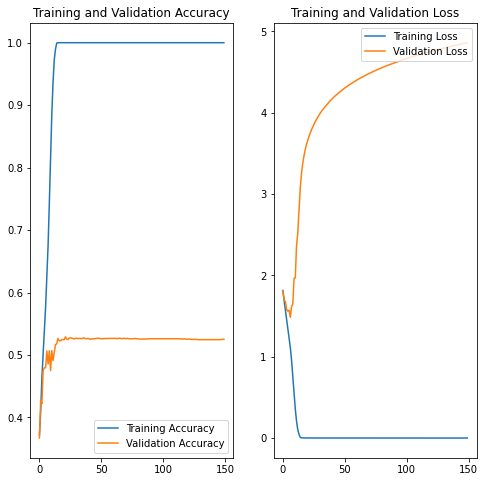

In [16]:
# Plot the Training and Validation Accuracy & Loss Scores
history = history3
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
# Save the Model
model.save('food_model_2.h5')

### Modification

In [76]:
train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


test_data_generator = ImageDataGenerator(
    rescale = 1./255)
valid_data_generator = ImageDataGenerator(
    rescale = 1./255)


In [77]:
# Directories for your training, validation and test splits
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [78]:
train_data = train_data_generator.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

val_data = test_data_generator.flow_from_directory(
    validation_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode='categorical')

test_data = valid_data_generator.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [79]:
class_num = train_data.num_classes
class_num

10

### modified model 1

In [116]:
# Build the Model
# Load resnet with pre-trained data
ResNet50V2 = tf.keras.applications.resnet_v2.ResNet50V2(
    input_shape=(img_width, img_height, 3),
    include_top=False, #dont need train, increase speed
    weights='imagenet', # the frequent one, 
    pooling='avg', #the frequent one
    classes=class_num
)

In [117]:
# Already pre-trained data, so this part is only the feature layer, no training
for layer in ResNet50V2.layers:
    layer.trainable = False

In [118]:
# Add classification layer
model_ResNet = tf.keras.Sequential([
    ResNet50V2,
    tf.keras.layers.Flatten(),# make it to 1d 
    tf.keras.layers.Dense(class_num, activation = 'softmax')
    ])

In [119]:
model_ResNet.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten_16 (Flatten)        (None, 2048)              0         
                                                                 
 dense_29 (Dense)            (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [120]:
# Compile models using training
model_ResNet.compile(
    loss='categorical_crossentropy', # it is for classification
    optimizer=tf.keras.optimizers.Adam(learning_rate=.0001), # avoid bottom high learningr skip aggregation point
    metrics=['accuracy'])

In [121]:
# Train the Model
epochs= 60
history = model_ResNet.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
  use_multiprocessing = False
)

Epoch 1/60
235/235 [==============================] - 114s 480ms/step - loss: 2.1791 - accuracy: 0.2817 - val_loss: 1.6662 - val_accuracy: 0.4475
Epoch 2/60
235/235 [==============================] - 112s 478ms/step - loss: 1.5080 - accuracy: 0.4909 - val_loss: 1.3501 - val_accuracy: 0.5630
Epoch 3/60
235/235 [==============================] - 112s 477ms/step - loss: 1.3131 - accuracy: 0.5623 - val_loss: 1.2167 - val_accuracy: 0.6100
Epoch 4/60
235/235 [==============================] - 113s 480ms/step - loss: 1.2031 - accuracy: 0.6009 - val_loss: 1.1370 - val_accuracy: 0.6425
Epoch 5/60
235/235 [==============================] - 113s 479ms/step - loss: 1.1352 - accuracy: 0.6276 - val_loss: 1.0967 - val_accuracy: 0.6540
Epoch 6/60
235/235 [==============================] - 113s 479ms/step - loss: 1.0908 - accuracy: 0.6387 - val_loss: 1.0608 - val_accuracy: 0.6680
Epoch 7/60
235/235 [==============================] - 113s 479ms/step - loss: 1.0485 - accuracy: 0.6543 - val_loss: 1.0380 -

Epoch 57/60
235/235 [==============================] - 113s 480ms/step - loss: 0.7098 - accuracy: 0.7655 - val_loss: 0.8323 - val_accuracy: 0.7350
Epoch 58/60
235/235 [==============================] - 113s 479ms/step - loss: 0.7347 - accuracy: 0.7543 - val_loss: 0.8292 - val_accuracy: 0.7405
Epoch 59/60
235/235 [==============================] - 113s 481ms/step - loss: 0.7162 - accuracy: 0.7583 - val_loss: 0.8243 - val_accuracy: 0.7415
Epoch 60/60
235/235 [==============================] - 113s 481ms/step - loss: 0.7046 - accuracy: 0.7636 - val_loss: 0.8224 - val_accuracy: 0.7380


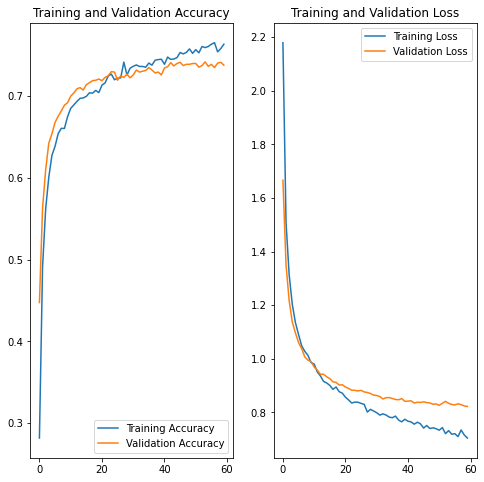

In [122]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [101]:
# Save the Model
model_ResNet.save('food_model_1.h5')

### Modified model 2

In [57]:
# Build the Model
model = models.Sequential()
# 
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2))) # max pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #relu spread out

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(class_num, activation = 'softmax')) #

# 编译模型
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adagrad(learning_rate=.02),
              metrics=['acc'])

In [58]:
# Train the Model

epochs= 130
history3 = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/130
235/235 [==============================] - 72s 304ms/step - loss: 2.2897 - acc: 0.1185 - val_loss: 2.2966 - val_acc: 0.1385
Epoch 2/130
235/235 [==============================] - 68s 291ms/step - loss: 2.2206 - acc: 0.1664 - val_loss: 2.1359 - val_acc: 0.2170
Epoch 3/130
235/235 [==============================] - 68s 291ms/step - loss: 2.1256 - acc: 0.2392 - val_loss: 1.9655 - val_acc: 0.3035
Epoch 4/130
235/235 [==============================] - 68s 291ms/step - loss: 2.0162 - acc: 0.2925 - val_loss: 1.9080 - val_acc: 0.3215
Epoch 5/130
235/235 [==============================] - 69s 293ms/step - loss: 1.9587 - acc: 0.3084 - val_loss: 1.9095 - val_acc: 0.3285
Epoch 6/130
235/235 [==============================] - 69s 293ms/step - loss: 1.9074 - acc: 0.3295 - val_loss: 2.0192 - val_acc: 0.2990
Epoch 7/130
235/235 [==============================] - 68s 291ms/step - loss: 1.8772 - acc: 0.3416 - val_loss: 1.9621 - val_acc: 0.3070
Epoch 8/130
235/235 [===========================

Epoch 61/130
235/235 [==============================] - 68s 287ms/step - loss: 1.1115 - acc: 0.6229 - val_loss: 1.0678 - val_acc: 0.6410
Epoch 62/130
235/235 [==============================] - 68s 290ms/step - loss: 1.1082 - acc: 0.6313 - val_loss: 1.0404 - val_acc: 0.6560
Epoch 63/130
235/235 [==============================] - 68s 290ms/step - loss: 1.1115 - acc: 0.6224 - val_loss: 1.1598 - val_acc: 0.6305
Epoch 64/130
235/235 [==============================] - 68s 289ms/step - loss: 1.1092 - acc: 0.6273 - val_loss: 1.0722 - val_acc: 0.6455
Epoch 65/130
235/235 [==============================] - 68s 290ms/step - loss: 1.0911 - acc: 0.6329 - val_loss: 1.1213 - val_acc: 0.6385
Epoch 66/130
235/235 [==============================] - 68s 290ms/step - loss: 1.0917 - acc: 0.6368 - val_loss: 1.0447 - val_acc: 0.6615
Epoch 67/130
235/235 [==============================] - 68s 288ms/step - loss: 1.0861 - acc: 0.6379 - val_loss: 1.0358 - val_acc: 0.6595
Epoch 68/130
235/235 [===================

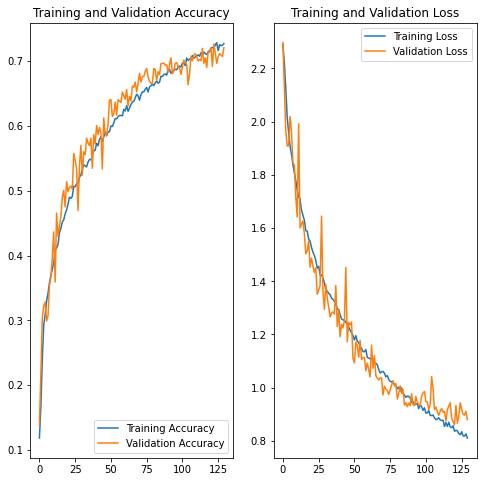

In [59]:
# Plot the Training and Validation Accuracy & Loss Scores
history = history3
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:
# Save the Model
model.save('food_model_2.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [123]:
# Model #1
model1 = keras.models.load_model('food_model_1.h5')


In [124]:
test_loss, test_acc = model1.evaluate(test_data)
print('model1 test acc:', test_acc)

16/16 [==============================] - 6s 373ms/step - loss: 1.7784 - accuracy: 0.7200
model1 test acc: 0.7200000286102295


In [125]:
 # Model #2
model2 = keras.models.load_model('food_model_2.h5')


In [126]:
test_loss, test_acc = model2.evaluate(test_data)
print('model2 test acc:', test_acc)

16/16 [==============================] - 2s 91ms/step - loss: 0.7537 - acc: 0.7640
model2 test acc: 0.7639999985694885


In [127]:
# Save the best model


model2.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [128]:
# Load the model
model = keras.models.load_model('food_model_best.h5')

In [129]:
# Load the food list (in alphabetical order)
with open('55.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beef_carpaccio', 'dumplings', 'fish_and_chips', 'grilled_salmon', 'mussels', 'paella', 'ravioli', 'spaghetti_bolognese', 'tacos', 'waffles']


In [130]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_width,img_height))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_width,img_height,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

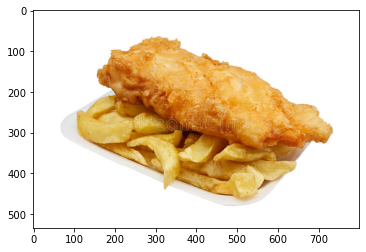

The prediction is:  fish_and_chips 

    beef_carpaccio  dumplings  fish_and_chips  grilled_salmon   mussels  \
0        0.000002    0.00324        0.923602        0.040547  0.000774   

     paella   ravioli  spaghetti_bolognese     tacos   waffles  
0  0.013501  0.004184              0.00256  0.004196  0.007394  


In [131]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'fishchips.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

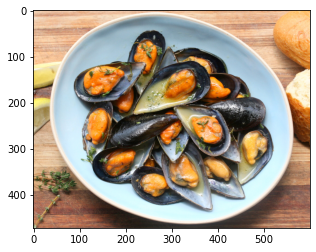

The prediction is:  mussels 

    beef_carpaccio     dumplings  fish_and_chips  grilled_salmon   mussels  \
0    8.674502e-08  1.626399e-07        0.000001        0.000476  0.988835   

    paella       ravioli  spaghetti_bolognese         tacos   waffles  
0  0.00964  5.913390e-07         3.013373e-09  5.326602e-07  0.001046  


In [132]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'mussle.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

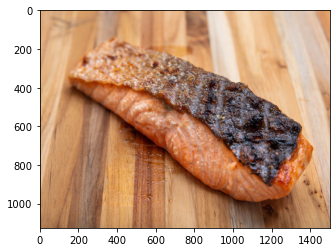

The prediction is:  grilled_salmon 

    beef_carpaccio  dumplings  fish_and_chips  grilled_salmon   mussels  \
0        0.000079   0.000238        0.010439        0.962305  0.004355   

     paella   ravioli  spaghetti_bolognese     tacos   waffles  
0  0.004898  0.012247             0.000078  0.003275  0.002086  


In [133]:
img = 'grilled_salmon.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

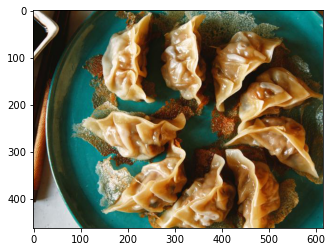

The prediction is:  tacos 

    beef_carpaccio  dumplings  fish_and_chips  grilled_salmon   mussels  \
0        0.002439   0.028358        0.109284        0.028354  0.012211   

     paella   ravioli  spaghetti_bolognese     tacos   waffles  
0  0.083526  0.017112             0.015903  0.637777  0.065037  


In [134]:
img = 'dumpling.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)